### Libraries

In [286]:
from datetime import datetime
import time
import pandas as pd
import matplotlib.pyplot as plt

### Welcome Messege

In [287]:
print('\nHello! Let\'s explore some STC JAWWY TV data!\n')


Hello! Let's explore some STC JAWWY TV data!



### Loading Data

In [288]:
# load data file into a dataframe
df = pd.read_csv('STC_Jawwy_TV.csv', skipinitialspace=True)
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,5/27/2017,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,5/21/2017,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,8/10/2017,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,7/26/2017,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,7/7/2017,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


### Drop Columns

In [289]:
df.drop(['Column1', 'program_name', 'program_desc'], axis = 1, inplace = True)

### Duplicates

In [290]:
df.duplicated
df = df.drop_duplicates()
df.shape

(946192, 10)

### Rename Columns

In [291]:
df = df.rename(columns={"date_":"Date","user_id_maped":"User ID","program_name":"Program Name","duration_seconds":"Duration Seconds","program_class":"Type",
"season":"Season","episode":"Episode","program_genre":"Genre","series_title":"Series Title","hd":"HD","original_name":"Name"})

### Set Time

In [292]:
df['Date'] = df['Date'].apply(lambda val: datetime.strptime(val, "%m/%d/%Y"))

### EDA

In [293]:
print(df.head())
nan_count = df.isna().sum().sum()
print('NaN Values = ',nan_count)
print('Shipe is ',df.shape)
print(df.dtypes)
df.duplicated


        Date  User ID  Duration Seconds   Type  Season  Episode      Genre  \
0 2017-05-27    26138                40  MOVIE       0        0      Drama   
1 2017-05-21     7946                17  MOVIE       0        0  Animation   
2 2017-08-10     7418                 8  MOVIE       0        0  Animation   
3 2017-07-26    19307                76  MOVIE       0        0  Animation   
4 2017-07-07    15860                87  MOVIE       0        0  Biography   

   Series Title  HD                  Name  
0             0   0            100 treets  
1             0   1                 Moana  
2             0   1  The Mermaid Princess  
3             0   1  The Mermaid Princess  
4             0   1             Churchill  
NaN Values =  0
Shipe is  (946192, 10)
Date                datetime64[ns]
User ID                      int64
Duration Seconds             int64
Type                        object
Season                       int64
Episode                      int64
Genre             

<bound method DataFrame.duplicated of               Date  User ID  Duration Seconds             Type  Season  \
0       2017-05-27    26138                40            MOVIE       0   
1       2017-05-21     7946                17            MOVIE       0   
2       2017-08-10     7418                 8            MOVIE       0   
3       2017-07-26    19307                76            MOVIE       0   
4       2017-07-07    15860                87            MOVIE       0   
...            ...      ...               ...              ...     ...   
1048570 2017-04-22    23716              4865            MOVIE       0   
1048571 2017-11-29     1776              1261  SERIES/EPISODES       7   
1048572 2017-06-15     1918                 6  SERIES/EPISODES       1   
1048573 2017-09-11    25737                72            MOVIE       0   
1048574 2017-05-02    19844              2685            MOVIE       0   

         Episode      Genre  Series Title  HD                   Name  
0 

## Top 5 TV Shows Genre in Number of Content 

In [294]:
cat_5 = df.groupby('Genre')['Type'].apply(lambda x: (x=='SERIES/EPISODES').sum()).reset_index(name='count')
cat_5 = cat_5.sort_values(by='count', ascending=False)
cat_5.head(5)



,Genre,count
2,Animation,248225
7,Drama,103280
4,Comedy,67132
0,Action,61727
9,Horror,34881


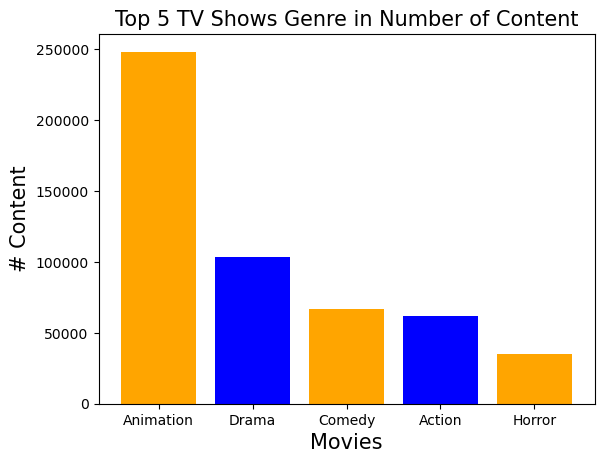

In [295]:
Genre = ['Animation', 'Drama', 'Comedy', 'Action', 'Horror']
count  = [248225, 103280, 67132, 61727, 34881]
colors = ['orange','blue']

plt.bar(Genre, count, color= colors)
plt.title('Top 5 TV Shows Genre in Number of Content',fontsize = 15)
plt.xlabel('Movies',fontsize = 15)
plt.ylabel('# Content',fontsize = 15)

plt.show()

### Top 5 Most Watched TV Shows Seasons

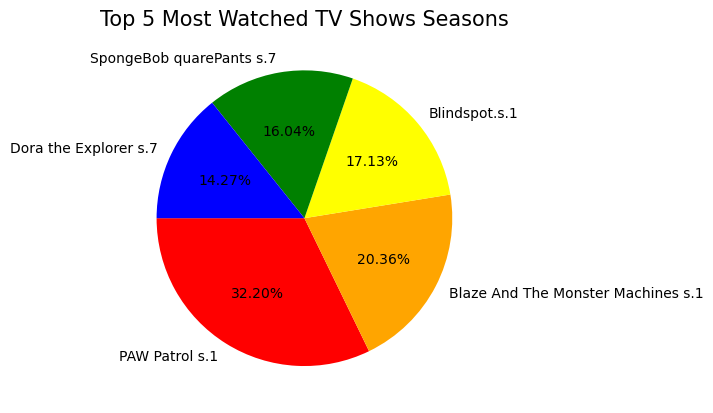

In [309]:
#[(df['Type'] == 'SERIES/EPISODES')]

tv_show = df.groupby(['Name','Season'])['Duration Seconds'].sum().sort_values(ascending=False)
tv_show.head(5)



Name = ['PAW Patrol s.1','Blaze And The Monster Machines s.1','Blindspot.s.1','SpongeBob quarePants s.7','Dora the Explorer s.7']
sizes = [ 32217715,20368166,17140859,16043246,14276717]
colors = ['RED','ORANGE','YELLOW','GREEN', 'BLUE']
plt.title('Top 5 Most Watched TV Shows Seasons',fontsize = 15)
plt.pie(sizes,labels=Name, autopct='%1.2f%%', colors =colors,  startangle=180, radius=1)

plt.show()

